In [1]:
import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline  

In [2]:
df_v = pd.read_csv('/mnt/stripe/bio/experiments/snp/combined_PCA/plink.eigenval', sep=" ", header=None)

In [3]:
e_values = df_v.as_matrix()[:, 0]
var = e_values ** 2
var = var / np.sum(var)

In [4]:
var * 100

array([  8.14131950e+01,   1.61463051e+01,   1.33842891e+00,
         7.61335465e-01,   3.28494217e-02,   2.53204051e-02,
         2.12745876e-02,   1.34254090e-02,   1.28277426e-02,
         1.15009193e-02,   1.04415957e-02,   1.03881740e-02,
         9.96099690e-03,   9.53952910e-03,   9.20525742e-03,
         8.91422064e-03,   8.57648883e-03,   8.13068571e-03,
         8.03589252e-03,   7.87262470e-03,   7.81025036e-03,
         7.67929202e-03,   7.61432511e-03,   7.48675887e-03,
         7.24186139e-03,   7.14081903e-03,   7.12848123e-03,
         7.07187720e-03,   6.96528530e-03,   6.91796537e-03,
         6.83048714e-03,   6.78539922e-03,   6.72591962e-03,
         6.67602826e-03,   6.57782497e-03,   6.51070612e-03,
         6.47527686e-03,   6.42686063e-03,   6.40613252e-03])

In [5]:
df = pd.read_csv('/mnt/stripe/bio/experiments/snp/combined_PCA/plink.eigenvec', sep=" ", header=None)

In [6]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,40
0,HG00096,HG00096,-0.009876,0.025992,-0.014367,-0.018277,0.003372,0.008359,-0.000407,-0.000366,...,0.027475,0.023399,-0.014255,-0.000195,-0.019077,0.006290,-0.018267,-0.022268,-0.027800,-0.026332
1,HG00097,HG00097,-0.009550,0.026407,-0.012133,-0.021517,-0.000298,0.001541,-0.006505,-0.005745,...,0.039737,-0.005074,-0.038965,0.027408,0.038923,0.006117,-0.006362,-0.033668,0.013821,-0.000860
2,HG00099,HG00099,-0.009982,0.026000,-0.010776,-0.016394,-0.009417,0.009908,0.003536,-0.013538,...,0.007119,0.035487,-0.015941,0.018650,0.037502,-0.010421,-0.045608,0.019042,-0.010188,-0.041333
3,HG00100,HG00100,-0.009701,0.028123,-0.010878,-0.015951,-0.007920,0.017861,-0.000368,-0.003624,...,0.012303,-0.006050,-0.042134,0.003762,0.008117,-0.006618,-0.029973,-0.027627,-0.011773,0.004696
4,HG00101,HG00101,-0.010952,0.026727,-0.012338,-0.018857,-0.008866,0.003047,-0.009890,-0.007659,...,-0.014035,-0.005506,-0.022883,-0.010249,0.022258,0.018464,-0.039617,-0.005753,-0.005824,-0.010213


In [7]:
fen_df = pd.read_csv('/mnt/stripe/bio/experiments/snp/1000g/integrated_call_samples.20130502.ALL.ped', sep="\t")

In [8]:
super_population_map = {
"CHB": "EAS",
"JPT": "EAS",
"CHS": "EAS",
"CDX": "EAS",
"KHV": "EAS",
"CEU": "EUR",
"TSI": "EUR",
"FIN": "EUR",
"GBR": "EUR",
"IBS": "EUR",
"YRI": "AFR",
"LWK": "AFR",
"GWD": "AFR",
"MSL": "AFR",
"ESN": "AFR",
"ASW": "AFR",
"ACB": "AFR",
"MXL": "AMR",
"PUR": "AMR",
"CLM": "AMR",
"PEL": "AMR",
"GIH": "SAS",
"PJL": "SAS",
"BEB": "SAS",
"STU": "SAS",
"ITU": "SAS",
"Aging": "Aging"
}

In [9]:
fen_population = fen_df["Population"]
population = []
for name in df[0]:
    ids = np.where(fen_df["Individual ID"] == name)[0]
    if len(ids) > 0:
        population.append(fen_population[ids[0]])
    else:
        population.append("Aging")

super_population = np.array([super_population_map[p] for p in population])
population = np.array(population)

values = sorted(list(set(super_population)))

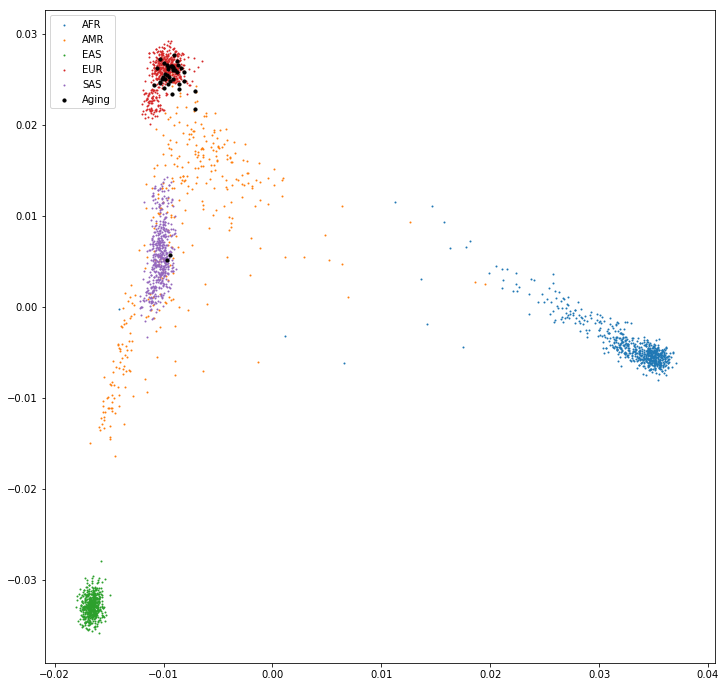

In [10]:
x = df[2]
y = df[3]

fig, ax = plt.subplots(figsize=(12,12))

for v in values:
    if v != "Aging":
        ax.scatter(x[super_population == v], y[super_population == v], label=v, s=1)

v = "Aging"     

x = x[super_population == v].values
y = y[super_population == v].values
names = [name for name in df[0].values[super_population == v]]
    
ax.scatter(x, y, label=v, s=10, color='black')

#for i, txt in enumerate(names):
#    ax.annotate(txt, (x[i], y[i]))

plt.legend(loc='upper left');

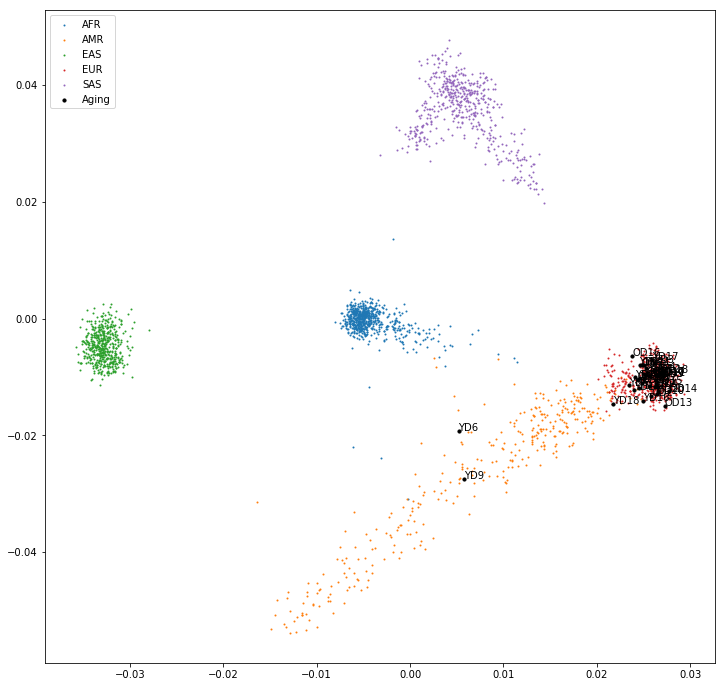

In [11]:
x = df[3]
y = df[4]

fig, ax = plt.subplots(figsize=(12,12))

for v in values:
    if v != "Aging":
        ax.scatter(x[super_population == v], y[super_population == v], label=v, s=1)

v = "Aging"     

x = x[super_population == v].values
y = y[super_population == v].values
names = [name for name in df[0].values[super_population == v]]
    
ax.scatter(x, y, label=v, s=10, color='black')

for i, txt in enumerate(names):
    ax.annotate(txt, (x[i], y[i]))

plt.legend(loc='upper left');

In [12]:
import numpy as np
from sklearn.manifold import TSNE

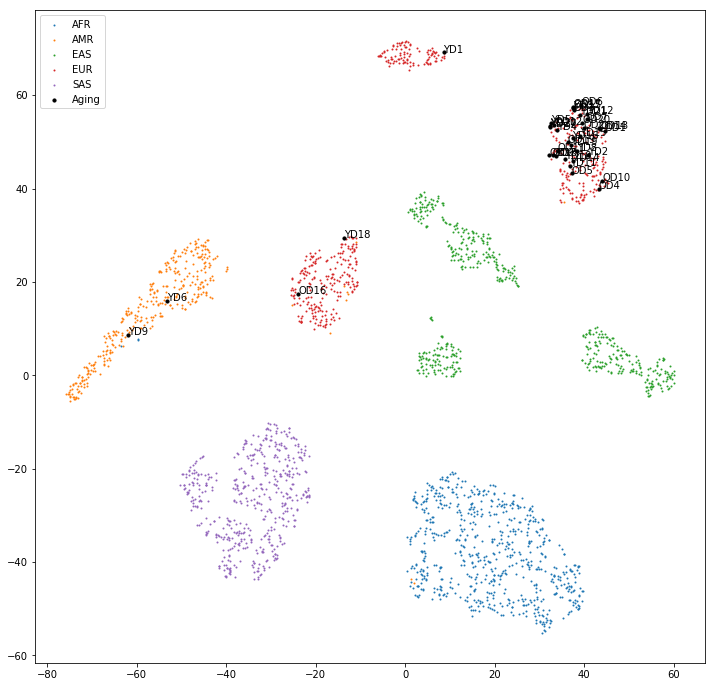

In [16]:
X = df.values[:, 2:8]
X_embedded = TSNE(n_components=2).fit_transform(X)

x = X_embedded[:,0]
y = X_embedded[:,1]

fig, ax = plt.subplots(figsize=(12,12))

for v in values:
    if v != "Aging":
        ax.scatter(x[super_population == v], y[super_population == v], label=v, s=1)

v = "Aging"     

x = x[super_population == v]
y = y[super_population == v]
names = [name for name in df[0].values[super_population == v]]
    
ax.scatter(x, y, label=v, s=10, color='black')

for i, txt in enumerate(names):
    ax.annotate(txt, (x[i], y[i]))
    
plt.legend(loc='upper left');

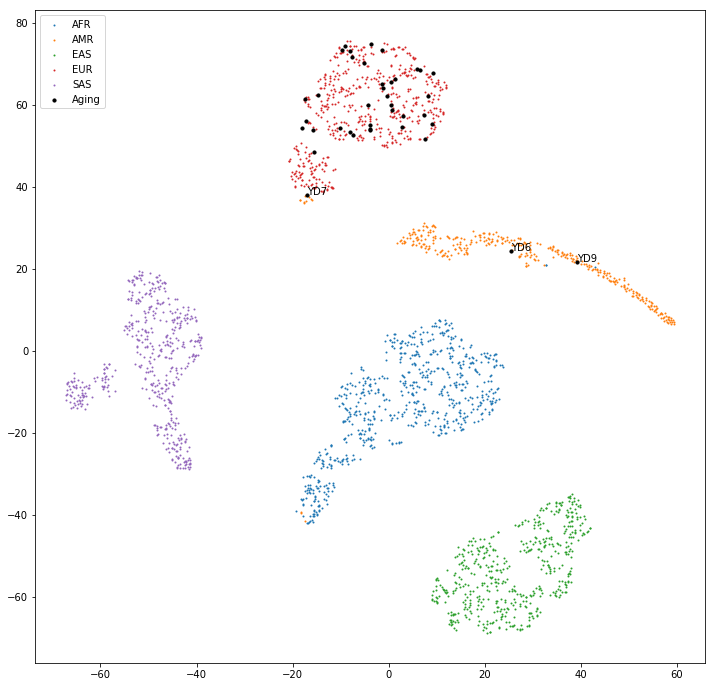

In [17]:
X = df.values[:, 2:6]
X_embedded = TSNE(n_components=2).fit_transform(X)

x = X_embedded[:,0]
y = X_embedded[:,1]

fig, ax = plt.subplots(figsize=(12,12))

for v in values:
    if v != "Aging":
        ax.scatter(x[super_population == v], y[super_population == v], label=v, s=1)

v = "Aging"     

x = x[super_population == v]
y = y[super_population == v]
names = [name for name in df[0].values[super_population == v]]
    
ax.scatter(x, y, label=v, s=10, color='black')

for i, txt in enumerate(names):
    if txt in ["YD6", "YD9", "YD7"]:
        ax.annotate(txt, (x[i], y[i]))
    
plt.legend(loc='upper left');

plt.savefig('SNP_tSNE.pdf')

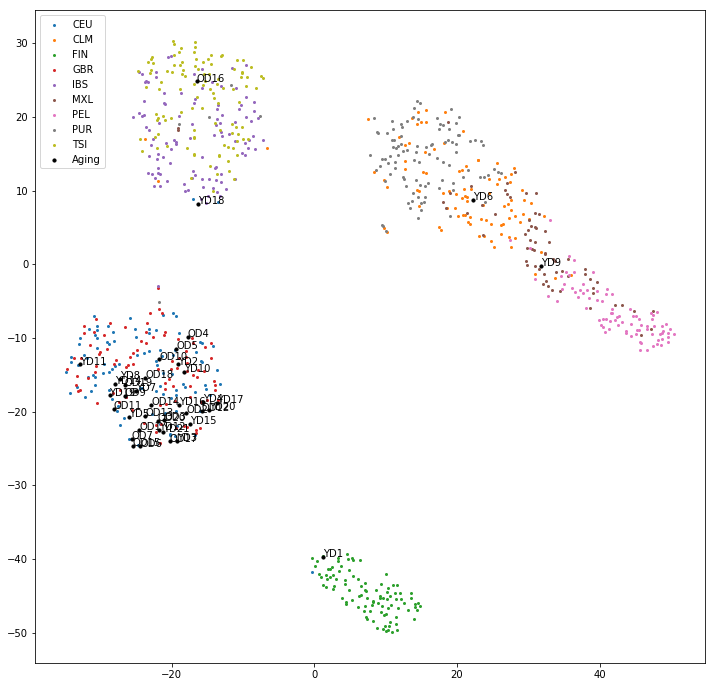

In [14]:
mask = np.logical_or(np.logical_or(super_population == 'EUR', super_population == 'AMR'), 
                     super_population == 'Aging')

X = df.values[mask, 2:10]
X_embedded = TSNE(n_components=2).fit_transform(X)

x = X_embedded[:,0]
y = X_embedded[:,1]

population_s = population[mask]

values_s = sorted(list(set(population_s)))

fig, ax = plt.subplots(figsize=(12,12))

for v in values_s:
    if v != "Aging":
        ax.scatter(x[population_s == v], y[population_s == v], label=v, s=4)

v = "Aging"     

x = x[population_s == v]
y = y[population_s == v]
names = [name for name in df[0].values[mask][population_s == v]]
    
ax.scatter(x, y, label=v, s=10, color='black')

for i, txt in enumerate(names):
    ax.annotate(txt, (x[i], y[i]))
    
plt.legend(loc='upper left');